# Fase 1: Data Cleaning

In [63]:
# Importar librerías
import os
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## Manipulación y preparación de datos

In [64]:
# Definendo ruta de trabajo
path = r"D:/Usuario/Escritorio/MNA-MAESTRIA-IA/00.Proyecto-MLOps/MLOps/data/interim/"

In [65]:
# Cargar datos modificados
df_modified = pd.read_csv(path+'steel_energy_modified.csv')
df_modified.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,mixed_type_col
0,01/01/2018 00:15,3.17,2.95,0.0,NaN,73.21,100.0,900.0,Weekday,Monday,Light_Load,649
1,01/01/2018 00:30,4.0,4.46,0.0,0.0,66.77,100.0,1800.0,Weekday,Monday,Light_Load,NaN
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700.0,Weekday,Monday,Light_Load,696
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600.0,Weekday,Monday,Light_Load,630
4,01/01/2018 01:15,3.82,4.5,0.0,0.0,64.72,100.0,4500.0,Weekday,Monday,Light_Load,325


In [66]:
# Tipos de datos (modificados)
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35740 entries, 0 to 35739
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   date                                  35401 non-null  object
 1   Usage_kWh                             35339 non-null  object
 2   Lagging_Current_Reactive.Power_kVarh  35339 non-null  object
 3   Leading_Current_Reactive_Power_kVarh  35327 non-null  object
 4   CO2(tCO2)                             35370 non-null  object
 5   Lagging_Current_Power_Factor          35291 non-null  object
 6   Leading_Current_Power_Factor          35338 non-null  object
 7   NSM                                   35325 non-null  object
 8   WeekStatus                            35400 non-null  object
 9   Day_of_week                           35428 non-null  object
 10  Load_Type                             35432 non-null  object
 11  mixed_type_col              

In [67]:
# Obtener columans por tipo
df_cleaned = df_modified.copy()

date_cols = ['date']
object_cols = ['WeekStatus', 'Load_Type', 'Day_of_week']
num_cols = list(set(df_cleaned.columns) - set(date_cols) - set(object_cols))

col_mapping = {
    'datetime': date_cols,
    'object': object_cols,
    'float': num_cols
}

In [68]:
# Identificar valores unicos de cada columna de texto
for col in object_cols:
    display(df_cleaned[col].unique())

array(['Weekday', ' wEEKDAY ', nan, 'Weekend', ' wEEKEND ', ' NAN '],
      dtype=object)

array(['Light_Load', ' lIGHT_lOAD ', nan, 'Medium_Load', 'Maximum_Load',
       ' mEDIUM_lOAD ', ' mAXIMUM_lOAD ', ' NAN '], dtype=object)

array(['Monday', ' mONDAY ', ' tUESDAY ', 'Tuesday', 'Wednesday',
       ' wEDNESDAY ', 'Thursday', ' tHURSDAY ', 'Friday', ' fRIDAY ',
       'Saturday', ' sATURDAY ', 'Sunday', ' sUNDAY ', nan, ' NAN '],
      dtype=object)

In [69]:
# Limpieza y formateo numérico
for col in num_cols:
    # Eliminar cualquier carácter no numérico
    df_cleaned[col] = df_cleaned[col].replace(regex=r"[^0-9.\-]", value=np.nan)
    # Convertir a número (float)
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Limpieza y formateo de texto
for col in object_cols:
    df_cleaned[col] = df_cleaned[col].astype(str).str.strip().str.upper()
    df_cleaned[col] = df_cleaned[col].replace({'NAN': np.nan, 'NONE': np.nan, 'NULL': np.nan, '': np.nan})

# Limpieza y conversión de fechas
for col in date_cols:
    df_cleaned[col] = df_cleaned[col].astype(str).str.strip()
    df_cleaned[col] = pd.to_datetime(df_cleaned[col], format='%d/%m/%Y %H:%M', errors='coerce')

# 🔹 Casteo explícito final según col_mapping
for dtype, cols in col_mapping.items():
    for col in cols:
        if col not in df_cleaned.columns:
            continue

        if dtype == "float":
            df_cleaned[col] = df_cleaned[col].astype(float)

        elif dtype == "int":
            df_cleaned[col] = df_cleaned[col].astype("Int64")  # admite NaN

        elif dtype == "object":
            df_cleaned[col] = df_cleaned[col].astype("string")

        elif dtype == "datetime":
            # ya fue convertido arriba, solo aseguramos formato correcto
            df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors="coerce")

print("\n✅ Limpieza y casteo completo")
df_cleaned.info()


✅ Limpieza y casteo completo
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35740 entries, 0 to 35739
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35378 non-null  datetime64[ns]
 1   Usage_kWh                             33466 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  33431 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  33449 non-null  float64       
 4   CO2(tCO2)                             33484 non-null  float64       
 5   Lagging_Current_Power_Factor          33456 non-null  float64       
 6   Leading_Current_Power_Factor          33458 non-null  float64       
 7   NSM                                   33456 non-null  float64       
 8   WeekStatus                            35378 non-null  string        
 9   Day_of_week                           3541

In [70]:
# Verificar limpieza preliminar
for col in object_cols:
    display(df_cleaned[col].unique())


<StringArray>
['WEEKDAY', <NA>, 'WEEKEND']
Length: 3, dtype: string

<StringArray>
['LIGHT_LOAD', <NA>, 'MEDIUM_LOAD', 'MAXIMUM_LOAD']
Length: 4, dtype: string

<StringArray>
[   'MONDAY',   'TUESDAY', 'WEDNESDAY',  'THURSDAY',    'FRIDAY',  'SATURDAY',
    'SUNDAY',        <NA>]
Length: 8, dtype: string

In [71]:
#df_cleaned.describe(include='all').T

In [72]:
# Checar cantidad de nulos por columna
df_cleaned.isna().sum()

date                                      362
Usage_kWh                                2274
Lagging_Current_Reactive.Power_kVarh     2309
Leading_Current_Reactive_Power_kVarh     2291
CO2(tCO2)                                2256
Lagging_Current_Power_Factor             2284
Leading_Current_Power_Factor             2282
NSM                                      2284
WeekStatus                                362
Day_of_week                               327
Load_Type                                 328
mixed_type_col                          10644
dtype: int64

In [73]:
# Probar identificar si es posible imputar datos en fechas
display(df_cleaned.iloc[[19,20,21], :])
display(df_cleaned.iloc[[58,59,60], :])
display(df_cleaned.iloc[[109,110,111], :])

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,mixed_type_col
19,2018-01-01 05:00:00,3.31,3.60,0.0,0.0,67.68,100.0,18000.0,WEEKDAY,MONDAY,LIGHT_LOAD,NaN
20,NaT,3.56,4.07,0.0,0.0,65.84,NaN,18900.0,WEEKDAY,MONDAY,LIGHT_LOAD,NaN
21,2018-01-01 05:30:00,3.56,NaN,0.0,0.0,65.56,100.0,19800.0,WEEKDAY,MONDAY,LIGHT_LOAD,798.0


,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,mixed_type_col
58,2018-01-01 14:45:00,4.10,0.0,22.10,0.0,100.0,18.24,53100.0,WEEKDAY,MONDAY,LIGHT_LOAD,116.0
59,NaT,3.64,0.0,16.70,0.0,NaN,21.30,54000.0,WEEKDAY,MONDAY,LIGHT_LOAD,86.0
60,2018-01-01 15:15:00,3.92,0.0,19.33,0.0,100.0,19.87,54900.0,WEEKDAY,MONDAY,LIGHT_LOAD,493.0


,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,mixed_type_col
109,2018-01-02 03:30:00,NaN,4.03,0.0,NaN,66.21,100.0,12600.0,WEEKDAY,TUESDAY,LIGHT_LOAD,NaN
110,NaT,3.24,3.49,0.0,0.0,68.04,100.0,13500.0,WEEKDAY,TUESDAY,LIGHT_LOAD,NaN
111,2018-01-02 04:00:00,3.89,4.64,0.0,0.0,64.25,100.0,14400.0,WEEKDAY,TUESDAY,LIGHT_LOAD,955.0


In [74]:
# Fase de Imputacion
df_imputed = df_cleaned.copy()

# 1. Aseguramos que la columna esté ordenada cronológicamente
df_imputed = df_imputed.sort_values('date').reset_index(drop=True)

# 2. Imputamos fechas: si la primera fecha está vacía, la rellenamos con la primera no nula
if pd.isna(df_imputed.loc[0, 'date']):
    first_valid = df_imputed['date'].dropna().iloc[0]
    df_imputed.loc[0, 'date'] = first_valid - pd.Timedelta(minutes=15)

# Ahora imputamos los nulos con base en 15 min adicionales
for i in range(1, len(df_imputed)):
    if pd.isna(df_imputed.loc[i, 'date']):
        df_imputed.loc[i, 'date'] = df_imputed.loc[i-1, 'date'] + pd.Timedelta(minutes=15)

# Convertir columnas numéricas a float
df_imputed[num_cols] = df_imputed[num_cols].apply(pd.to_numeric, errors='coerce')

# 3. Imputar valores numéricos (mediana general, media para 'mixed_type_col')
for col in num_cols:
    if col == 'mixed_type_col':
        df_imputed[col] = df_imputed[col].fillna(df_imputed[col].mean())
    else:
        df_imputed[col] = df_imputed[col].fillna(df_imputed[col].median())

# 4️. Imputar y derivar variables categóricas
df_imputed['Day_of_week'] = df_imputed['Day_of_week'].fillna(
    df_imputed['date'].dt.day_name().str.upper()
)
df_imputed['WeekStatusNum'] = df_imputed['date'].dt.dayofweek
df_imputed['WeekStatus'] = df_imputed['WeekStatus'].fillna(
    df_imputed['WeekStatusNum'].apply(lambda x: 'WEEKEND' if x >= 5 else 'WEEKDAY')
)
df_imputed.drop('WeekStatusNum', axis=1, inplace=True)
    
# 5. Verificamos si quedan nulos
print("Nulos por columna después de imputar:")
print(df_imputed.isna().sum())

Nulos por columna después de imputar:
date                                      0
Usage_kWh                                 0
Lagging_Current_Reactive.Power_kVarh      0
Leading_Current_Reactive_Power_kVarh      0
CO2(tCO2)                                 0
Lagging_Current_Power_Factor              0
Leading_Current_Power_Factor              0
NSM                                       0
WeekStatus                                0
Day_of_week                               0
Load_Type                               328
mixed_type_col                            0
dtype: int64


In [75]:
# Corroborar con ejemplos anteriores
display(df_imputed.iloc[[19,20,21], :])
display(df_imputed.iloc[[58,59,60], :])
display(df_imputed.iloc[[109,110,111], :])

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,mixed_type_col
19,2018-01-01 04:45:00,3.74,4.54,0.0,0.0,63.58,100.0,17100.0,WEEKDAY,MONDAY,LIGHT_LOAD,929.000000
20,2018-01-01 05:00:00,3.31,3.60,0.0,0.0,67.68,100.0,18000.0,WEEKDAY,MONDAY,LIGHT_LOAD,497.651857
21,2018-01-01 05:30:00,3.56,5.04,0.0,0.0,65.56,100.0,19800.0,WEEKDAY,MONDAY,LIGHT_LOAD,798.000000


,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,mixed_type_col
58,2018-01-01 14:45:00,4.10,0.0,22.10,0.0,100.0,18.24,53100.0,WEEKDAY,MONDAY,LIGHT_LOAD,116.0
59,2018-01-01 15:15:00,3.92,0.0,19.33,0.0,100.0,19.87,54900.0,WEEKDAY,MONDAY,LIGHT_LOAD,493.0
60,2018-01-01 15:30:00,4.10,0.0,0.00,0.0,100.0,18.86,55800.0,WEEKDAY,MONDAY,LIGHT_LOAD,174.0


,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,mixed_type_col
109,2018-01-02 04:00:00,3.89,4.64,0.0,0.0,64.250,100.0,14400.0,WEEKDAY,TUESDAY,LIGHT_LOAD,955.000000
110,2018-01-02 04:15:00,3.28,5.04,0.0,0.0,88.185,100.0,43200.0,WEEKDAY,TUESDAY,LIGHT_LOAD,497.651857
111,2018-01-02 04:30:00,3.28,3.49,0.0,0.0,68.480,100.0,16200.0,WEEKDAY,TUESDAY,LIGHT_LOAD,497.651857


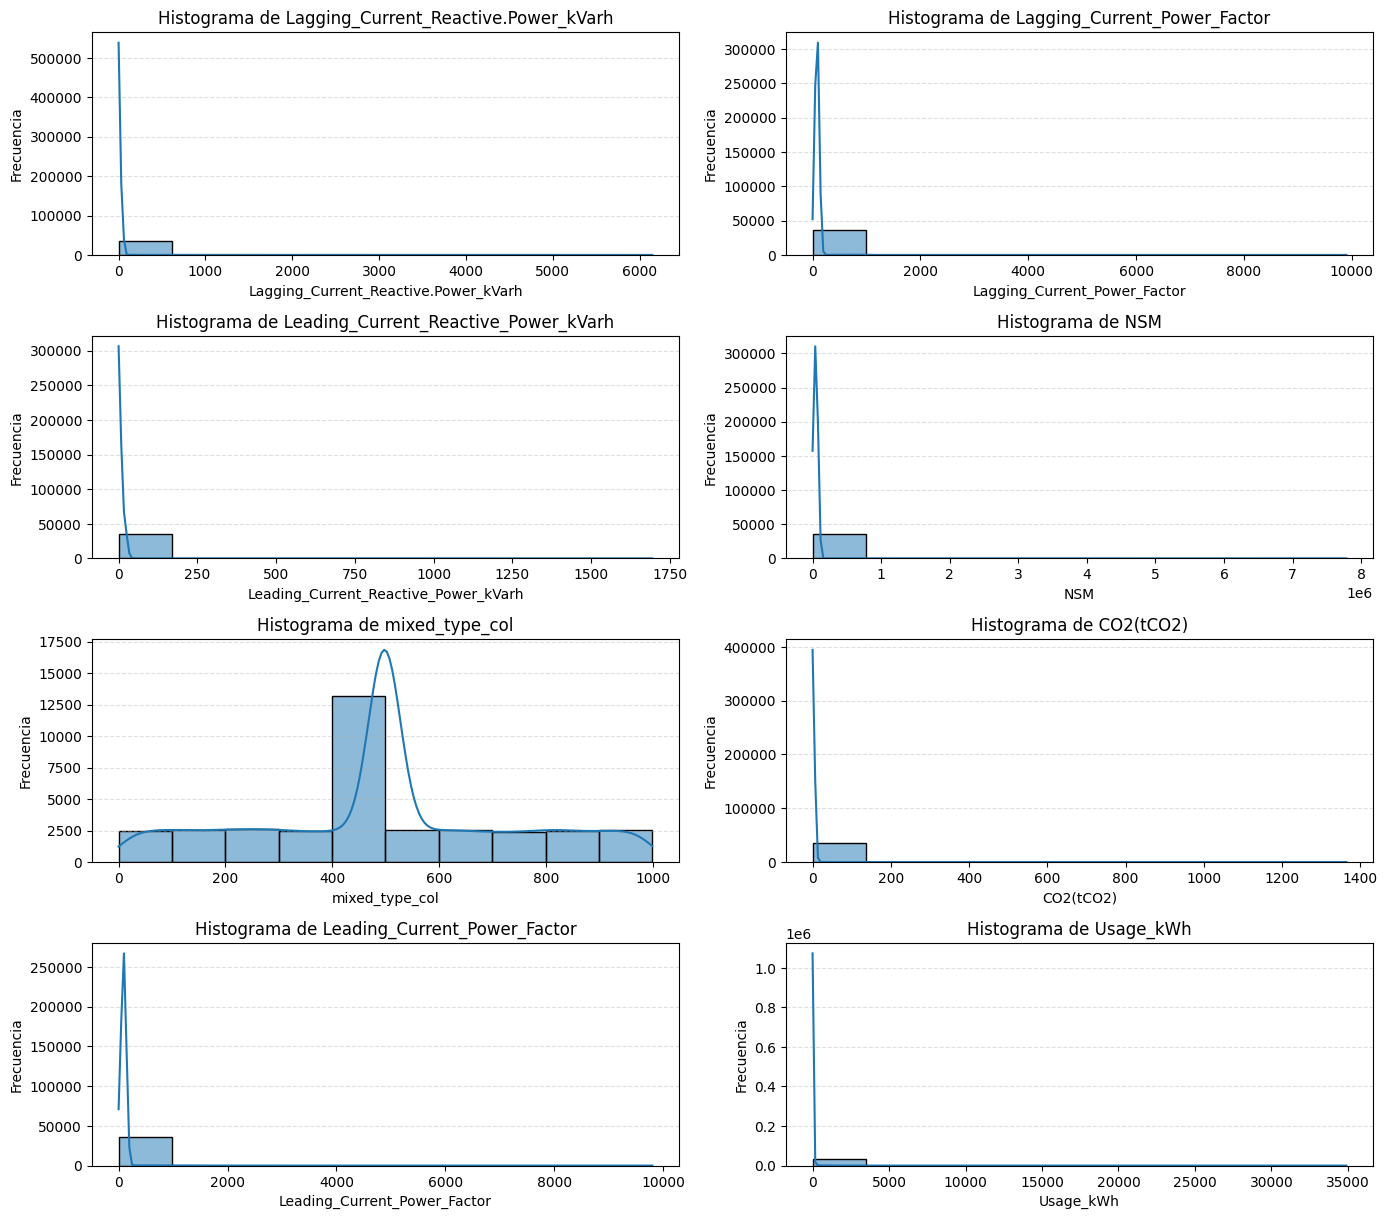

In [76]:
#Histograma de las variables númericas
plt.figure(figsize=(14, 24))

for i, col in enumerate(num_cols):
    plt.subplot(8, 2, i+1)
    plt.title(f"Histograma de {col}")
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', linestyle='--', alpha = 0.4)
    #Graficar 
    sns.histplot(df_imputed[col], bins = 10, kde = True)

plt.tight_layout()


In [77]:
# Usar describe para complementar gráficas
df_imputed.describe()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,mixed_type_col
count,35740,35740.000000,35740.000000,35740.000000,35740.000000,35740.000000,35740.000000,3.574000e+04,35740.000000
mean,2018-07-04 11:43:53.242865152,37.053198,17.939194,7.083768,2.440641,100.503091,108.985823,5.224500e+04,497.651857
min,2018-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2018-04-03 05:41:15,3.280000,2.810000,0.000000,0.000000,65.540000,99.910000,2.250000e+04,352.000000
50%,2018-07-04 11:30:00,4.610000,5.040000,0.000000,0.000000,88.185000,100.000000,4.320000e+04,497.651857
75%,2018-10-04 17:48:45,49.680000,21.380000,1.190000,0.020000,98.340000,100.000000,6.300000e+04,638.000000
max,2019-01-04 18:15:00,34899.480000,6145.920000,1694.220000,1364.040000,9900.000000,9800.000000,7.783200e+06,999.000000
std,NaN,270.373729,88.425214,51.671554,39.934077,303.594534,361.667232,1.886419e+05,241.717654


In [82]:
# Porcentaje de nulos de load_type
print( (df_imputed['Load_Type'].isna().sum()  / df_imputed.shape[0]) * 100 )
print("Menos del 1% del dataset tienen nulo en Load_Type")

0.9177392277560157
Menos del 1% del dataset tienen nulo en Load_Type


In [ ]:
# Eliminar filas con target nulo (Load_Type nula)
df_final = df_imputed.dropna(subset=['Load_Type']).reset_index(drop=True)

print("Filas eliminadas:", df_imputed.shape[0] - df_final.shape[0])
print("Total final:", df_final.shape)

Filas eliminadas: 328
Total final: (35412, 12)


In [87]:
# Verificamos:
df_final['Load_Type'].value_counts(normalize=True)

Load_Type
LIGHT_LOAD      0.516181
MEDIUM_LOAD     0.276855
MAXIMUM_LOAD    0.206964
Name: proportion, dtype: Float64

In [88]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35412 entries, 0 to 35411
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35412 non-null  datetime64[ns]
 1   Usage_kWh                             35412 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  35412 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35412 non-null  float64       
 4   CO2(tCO2)                             35412 non-null  float64       
 5   Lagging_Current_Power_Factor          35412 non-null  float64       
 6   Leading_Current_Power_Factor          35412 non-null  float64       
 7   NSM                                   35412 non-null  float64       
 8   WeekStatus                            35412 non-null  string        
 9   Day_of_week                           35412 non-null  string        
 10

In [89]:
print(os.getcwd())

d:\Usuario\Escritorio\MNA-MAESTRIA-IA\00.Proyecto-MLOps\MLOps\notebooks\fase1


In [90]:
# Crear la carpeta si no existe (subiendo dos niveles)
os.makedirs('../../data/clean', exist_ok=True)

In [91]:
# Guardar df_final en csv temporalmente
df_final.to_csv('../../data/clean/steel_energy_clean.csv', index=False)
print("✅ Archivo guardado en ../../data/clean/steel_energy_clean.csv")

✅ Archivo guardado en ../../data/clean/steel_energy_clean.csv


In [95]:
# Verificación
import pandas as pd
df_check = pd.read_csv('../../data/clean/steel_energy_clean.csv')
print(df_check.shape)
df_check.head(2)

(35412, 12)


,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,mixed_type_col
0,2018-01-01 00:00:00,3.42,3.46,0.0,0.0,70.30,100.0,0.0,WEEKDAY,MONDAY,LIGHT_LOAD,907.0
1,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900.0,WEEKDAY,MONDAY,LIGHT_LOAD,649.0
